# McCulloch-Pitts Neuron
* The early model on an artificial neuron is introduced by Warren McCulloch(neuroscientist) and Walter Pitt(logician) in 1943.
* The McCulloch-Pitts Neuron is also known as a **linear threshold gate**.

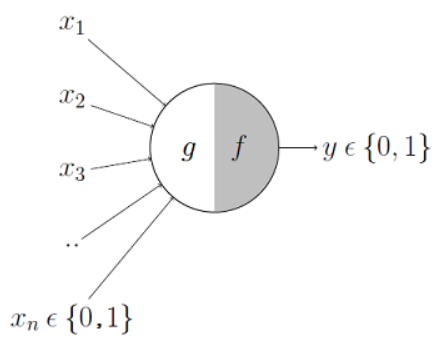

In [44]:
#Import library
from IPython.display import Image

# Load image from local storage
Image(filename = "D:\Learnings\Knowledge Guide\Deep Learning\Lecture Summary\mp_neuron.png", width = 400, height = 200)

* Inputs belong to a discrete set of values {0,1}
* **g** aggregates the inputs and function **f** takes a decision based on these aggregations.
* These inputs can be **excitatory** or **inhibitory**
    * y = 0 if x i is inhibitory (outputs zero, sort of an override), else
    $$ g(x) = \sum_{i=1}^{n} x_i = 1 $$

    * y = f(g(x))
        * y = 1 if g(x) >= b
        * y = 0 if g(x) < b
        * where b is a threshold value
        * b is a parameter, it is adjusted with the aim of maximizing the number of correct predictions
* The loss function which we consider here is **squared error loss** : $$(y_i - \hat{y})^2 $$
* In this case, we have only one parameter , so we can afford to use brute force search .
    *  Here, consider we have n features
    *  b can only range from 0 to n, else it would be a pointless parameter
    *  b has discrete values only, as the inputs are also discrete values

### Toy Dataset

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [46]:
# Create dataframe
mobile = pd.DataFrame({"Launch (within 6 months)" : [0,1,1,0,0,1,0,1,1,0],
                       "Weights (< 160 g)" : [1,0,1,0,0,0,1,0,0,1],
                       "ScreenSize (<5.9 inch)" : [1,0,1,0,1,0,1,0,1,0],
                       "Dual Sim" : [1,1,0,0,0,1,0,1,0,0],
                       "Internal mem(>= 64gb, 4gb ram)" : [1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                       "NFC" : [0, 1, 1, 0, 1, 0, 1, 1, 1, 0],
                       "Radio": [1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                       "Battery (>= 3500mAh)" : [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                       "Price (> 20 k)" : [0, 1, 1, 0, 0, 0, 1, 1, 1, 0],
                       "Liked" : [1, 1, 1, 0, 0, 1, 1, 1, 0, 0]})
mobile.head(10)

,Launch (within 6 months),Weights (< 160 g),ScreenSize (<5.9 inch),Dual Sim,"Internal mem(>= 64gb, 4gb ram)",NFC,Radio,Battery (>= 3500mAh),Price (> 20 k),Liked
0,0,1,1,1,1,0,1,0,0,1
1,1,0,0,1,1,1,0,0,1,1
2,1,1,1,0,1,1,0,0,1,1
3,0,0,0,0,1,0,1,1,0,0
4,0,0,1,0,1,1,1,0,0,0
5,1,0,0,1,1,0,1,1,0,1
6,0,1,1,0,1,1,0,0,1,1
7,1,0,0,1,1,1,0,1,1,1
8,1,0,1,0,1,1,0,0,1,0
9,0,1,0,0,0,0,0,0,0,0


The optimal value of thresold:  5


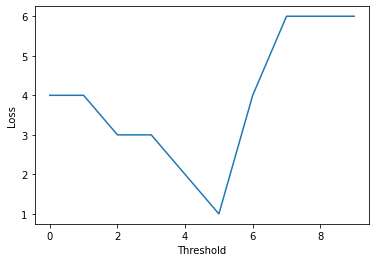

In [47]:
# MP Neuron
X = mobile.drop("Liked", axis = 1)
y_actual = mobile["Liked"]

# Learning optimal value of threshold
losses = []
for threshold in range(X.shape[1] + 1):
    data_sum = X.sum(axis = 1).to_list()
    y_pred = [1 if x >= threshold else 0 for x in data_sum]
    loss = (y_actual - np.array(y_pred)) ** 2
    losses.append(loss.sum())

print("The optimal value of thresold: ", losses.index(min(losses)))
plt.plot(list(range(mobile.shape[0])), losses)
plt.xlabel("Threshold")
plt.ylabel("Loss")
plt.show()

### MP Neuron Template
Let's put together MP Neuron in a class so that it can be reused whenever required.

In [48]:
class MPNeuron:
    
    def __init__(self):
        self.b = None
        
    def model(self, x):
        return(sum(x) >= self.b)
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y):
        accuracy = {}
        
        for b in range(X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred, Y)
            
        best_b = max(accuracy, key = accuracy.get)
        self.b = best_b
        
        print('Optimal value of b is ', best_b )
        print('Highest accuarcy is  ', accuracy[best_b])

In [49]:
# Create an instance of MP Neuron class
mp_neuron = MPNeuron()
mp_neuron.fit(X.values, y_actual)

# performance checking in train data is a bad idea, but here due to lack of data we are testing performance on train data only.
Y_test_pred = mp_neuron.predict(X.values)
print("Accuracy: ", accuracy_score(y_actual, Y_test_pred))

Optimal value of b is  5
Highest accuarcy is   0.9
Accuracy:  0.9


### Limitation of MP Neurons
1. Boolean input
2. Boolean output
3. Linear Decision boundary
4. Fixed slope ie, -1
5. Few possible integral intercept

# Perceptron Learning Algorithm

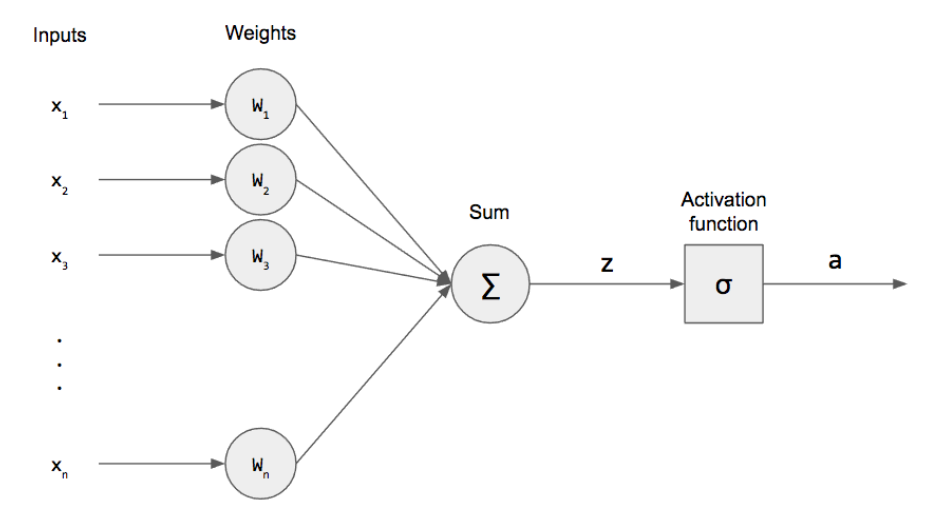

In [50]:
#Import library
from IPython.display import Image

# Load image from local storage
Image(filename = "D:\Learnings\Knowledge Guide\Deep Learning\Lecture Summary\perceptron.png", width = 600, height = 300)

* Real inputs, but binary output.
* Weights are assigned to each input which are kind of their relative significance.
* Threshold can be adjusted.
* $$\hat{y} = 1 \ if  \sum_{i=1}^{n} w_i*x_i >= b $$
$$else \  \hat{y} = 0$$
* b can now take real values, and slope can change by varying w. This results in more freedom than MP Neuron. However, it only works with linearly separable data
* Linear decision boundary.

### Perceptron Learning Algorithm

In [51]:
def perceptron(data, num_iter):
    features = data[:, :-1]
    labels = data[:, -1]
    
    # set weights to zero
    w = np.zeros(shape=(1, features.shape[1]+1))
    
    misclassified_ = [] 
  
    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(features, labels):
            x = np.insert(x,0,1)
            y = np.dot(w, x.transpose())
            target = 1.0 if (y > 0) else 0.0
            
            delta = (label - target)
            
            if(delta): # misclassified
                misclassified += 1
                w += (delta * x)
        
        misclassified_.append(misclassified)
    return (w, misclassified_)

final weights:  [[-4.  1.  4. -1.  6.  1.  0. -1. -1.  2.]]


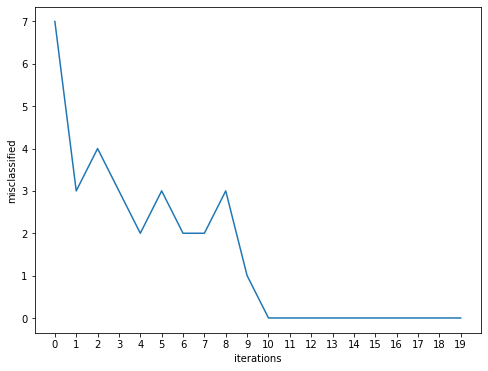

In [52]:
num_iter = 20
w, misclassified_ = perceptron(mobile.values, num_iter)

print("final weights: ", w) 
epochs = np.arange(1, num_iter+1)
plt.figure(figsize = (8, 6))
plt.plot(epochs, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.xticks(epochs, list(range(20)))
plt.show()

After 10 updates the loss has become zero.

### Perceptron Learning Algorithm Template

In [53]:
class Perceptron:
    
    def __init__(self):
        # w is array
        # b is scaler
        self.w = None
        self.b = None
        
    def model(self, x):
        # Loss Function
        return 1 if (np.dot(self.w, x) >= self.b) else 0
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
        
    def fit(self, X, Y, epochs = 1, lr = 1):
        
        self.w = np.ones(X.shape[1])
        self.b = 0
        
        accuracy = {}
        max_accuracy = 0
        
        for i in range(epochs): 
            for x, y in zip(X, Y):
                y_pred = self.model(x)
                if y == 1 and y_pred == 0 :
                    self.w  = self.w + lr * x
                    self.b  = self.b + lr * 1
                elif y == 0 and y_pred == 1 :
                    self.w  = self.w - lr * x
                    self.b  = self.b - lr * 1
                    
            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                
                # Check pointing to capture optimal value of parameter (w, b) that corresponds highest accuracy.
                chkptw = self.w
                chkptb = self.b
            
        self.w = chkptw
        self.b = chkptb
            
        print("Maximum Accuracy: ", max_accuracy)
        
        plt.plot(accuracy.values())
        plt.ylim([0, 1])
        plt.show()

Maximum Accuracy:  0.8


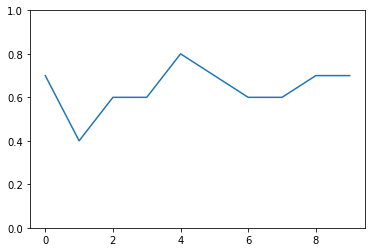

In [54]:
# Create an instance of Perceptron Class
perceptron = Perceptron()
perceptron.fit(X.values, mobile.values[:, -1], 10, 1)

Hyperparameters of Perceptron Learning Algorithm
1. Number of epocs
2. Learning rate

# MP Neurons and Perceptron Learning Algorithm in Real Data

In [55]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [56]:
bc = load_breast_cancer()

data = pd.DataFrame(data = bc["data"], columns = bc["feature_names"])
data["class"] = bc["target"]

# dimension
data.shape

(569, 31)

In [57]:
# Create Data
X = data.drop('class', axis = 1)
y = data['class']

In [58]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [59]:
print(data['class'].value_counts())
print(bc['target_names'])

1    357
0    212
Name: class, dtype: int64
['malignant' 'benign']


There are more records for Malignant then benign.

In [60]:
# Get Mean Group By
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [61]:
# split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2, stratify = y)

In [62]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


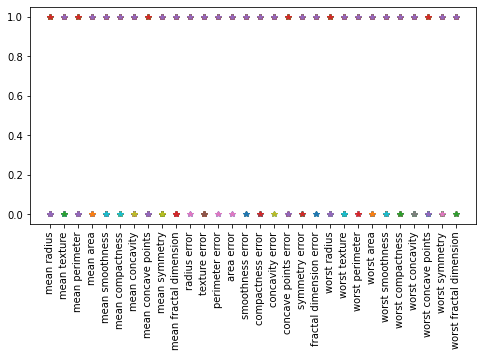

In [63]:
# Binarize the data
# The reason we have kepth labels this way is benign tends to have greater value
X_binarised_train = X_train.apply(pd.cut, bins = 2, labels = [1, 0])
X_binarised_test = X_test.apply(pd.cut, bins = 2, labels = [1, 0])

plt.figure(figsize = (8, 4))
plt.plot(X_binarised_train.T, "*")
plt.xticks(rotation = 'vertical')
plt.show()

### MP Neuron Peformance

In [64]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train.values, y_train)

Y_test_pred = mp_neuron.predict(X_binarised_test.values)
print("Accuracy: ", accuracy_score(y_test, Y_test_pred))

Optimal value of b is  28
Highest accuarcy is   0.8461538461538461
Accuracy:  0.7807017543859649


### Perceptron Learning Algorithm Peformance

Maximum Accuracy:  0.9098901098901099


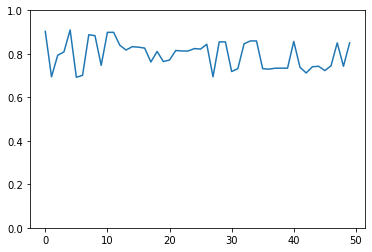

Performance of training data:  0.9098901098901099
Performance of testing data:  0.9298245614035088


In [69]:
perceptron = Perceptron()
perceptron.fit(X_train.values, y_train, 50, 0.1)

y_pred_train = perceptron.predict(X_train.values)
print("Performance of training data: ", accuracy_score(y_train.values, y_pred_train))

y_pred_test = perceptron.predict(X_test.values)
print("Performance of testing data: ", accuracy_score(y_test.values, y_pred_test))